<a href="https://colab.research.google.com/github/Rizil-Patel/-CrackYourInternship/blob/main/Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler


Loading of the file

In [2]:
dataset = pd.read_csv('weather.csv')

In [3]:
print(dataset)

     MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           6.0  ...           29   
1      

In [4]:
dataset.shape

(366, 22)

In [5]:
print(dataset.shape)
print(dataset.columns)

(366, 22)
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


In [6]:
dataset.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31
WindDir3pm,1
WindSpeed9am,7


In [7]:
# Dropping missing values and saving to a new CSV file
dataset_1 = dataset.dropna()
dataset_1.to_csv('weather_1.csv', index=False)

# Forward filling missing values and saving to a new CSV file
dataset_2 = dataset.ffill()
dataset_2.to_csv('weather_2.csv', index=False)

In [12]:
# Load the necessary scaler classes
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# One-Hot Encode categorical columns
dataset_1_encoded = pd.get_dummies(dataset_1, drop_first=True)
dataset_2_encoded = pd.get_dummies(dataset_2, drop_first=True)

# Apply Min-Max Scaling
dataset_1_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(dataset_1_encoded), columns=dataset_1_encoded.columns)
dataset_1_min_max_scaled.to_csv('weather_1_min_max_scaled.csv', index=False)

dataset_2_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(dataset_2_encoded), columns=dataset_2_encoded.columns)
dataset_2_min_max_scaled.to_csv('weather_2_min_max_scaled.csv', index=False)

# Apply Z-Score Standardization
dataset_1_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(dataset_1_encoded), columns=dataset_1_encoded.columns)
dataset_1_standard_scaled.to_csv('weather_1_standard_scaled.csv', index=False)

dataset_2_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(dataset_2_encoded), columns=dataset_2_encoded.columns)
dataset_2_standard_scaled.to_csv('weather_2_standard_scaled.csv', index=False)


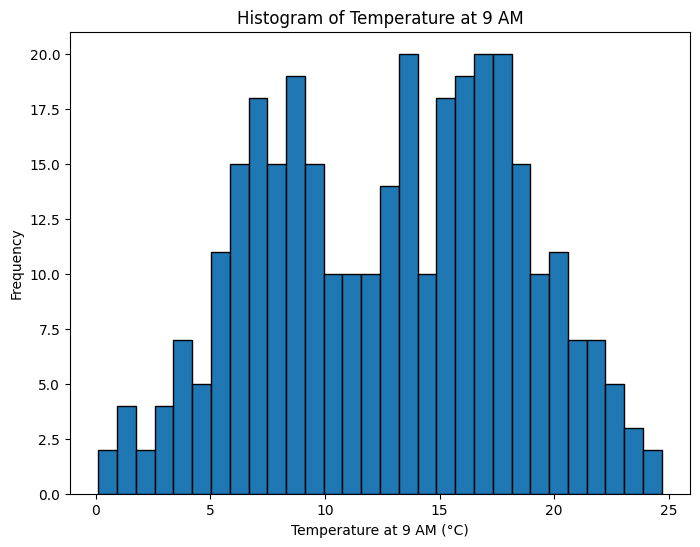

In [13]:
# Histogram for Temp9am
plt.figure(figsize=(8, 6))
plt.hist(dataset_1['Temp9am'], bins=30, edgecolor='k')
plt.title('Histogram of Temperature at 9 AM')
plt.xlabel('Temperature at 9 AM (°C)')
plt.ylabel('Frequency')
plt.show()


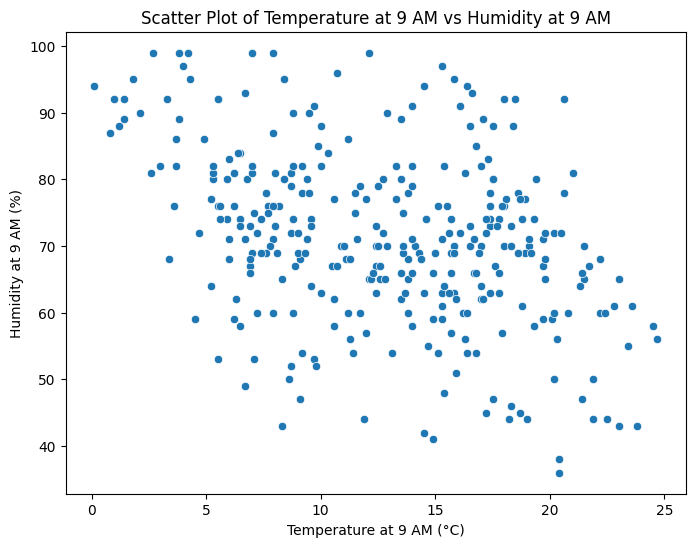

In [14]:
# Scatter plot between Temp9am and Humidity9am
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset_1['Temp9am'], y=dataset_1['Humidity9am'])
plt.title('Scatter Plot of Temperature at 9 AM vs Humidity at 9 AM')
plt.xlabel('Temperature at 9 AM (°C)')
plt.ylabel('Humidity at 9 AM (%)')
plt.show()

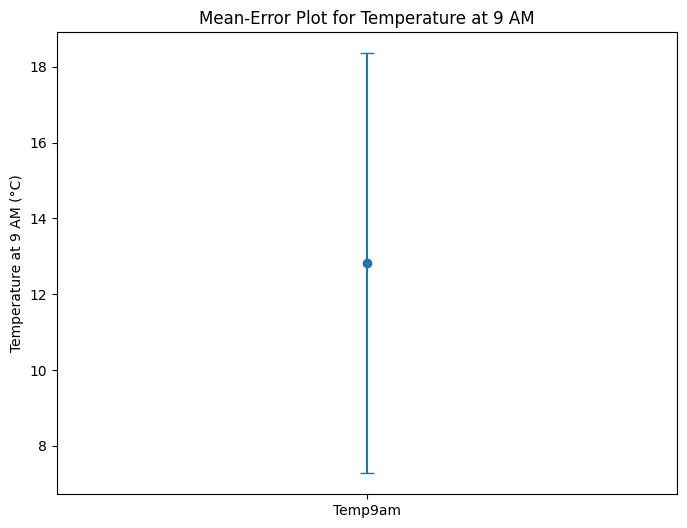

In [15]:
# Calculate mean and standard deviation
temp9am_mean = dataset_1['Temp9am'].mean()
temp9am_std = dataset_1['Temp9am'].std()

# Plotting mean and error bars
plt.figure(figsize=(8, 6))
plt.errorbar(x=['Temp9am'], y=[temp9am_mean], yerr=[temp9am_std], fmt='o', capsize=5)
plt.title('Mean-Error Plot for Temperature at 9 AM')
plt.ylabel('Temperature at 9 AM (°C)')
plt.show()
